In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv("/content/pizza_v1.csv")
data2 = pd.read_csv("/content/pizza_v2.csv")

In [3]:
data1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [4]:
# company
# Pizza brand/company
# price_rupiah
# Price in Indonesian Rupiah
# diameter القطر
# Size in inches
# topping
# Type of pizza topping
# variant البديل
# Variant name
# size
# Size category (jumbo/reguler)
# extra_sauce
# Whether extra sauce is included
# extra_cheese
# Whether extra cheese is included

In [5]:
data2.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [6]:
data1.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


In [27]:
data1['company'].value_counts()

,count
company,
C,30
E,30
A,25
B,24
D,20


In [7]:
data1.shape

(129, 8)

In [8]:
print("Number of Rows is : ",data1.shape[0])
print("Number of Columns is : ",data1.shape[1])

Number of Rows is :  129
Number of Columns is :  8


In [9]:
# Convert price to numeric
def clean_price(price):
    return float(price.replace('Rp', '').replace(',', ''))

In [10]:
data1['price_rupiah'] = data1['price_rupiah'].apply(clean_price)
data2['price_rupiah'] = data2['price_rupiah'].apply(clean_price)

# Clean diameter
data1['diameter'] = data1['diameter'].astype(float)
data2['diameter'] = data2['diameter'].str.replace(' inch', '').astype(float)

In [11]:
# Merge datasets on common features
merged_df = pd.merge(data1, data2[['price_rupiah', 'diameter', 'extra_mushrooms']],
                     on=['price_rupiah', 'diameter'],
                     how='inner')

# Rename and reorder columns
merged_df = merged_df.rename(columns={'extra_mushrooms_y': 'extra_mushrooms'})
merged_df = merged_df.drop(['company'], axis=1)

In [12]:
merged_df.head()

,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,155000.0,14.0,smoked beef,double_signature,reguler,yes,no,yes
4,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_rupiah     499 non-null    float64
 1   diameter         499 non-null    float64
 2   topping          499 non-null    object 
 3   variant          499 non-null    object 
 4   size             499 non-null    object 
 5   extra_sauce      499 non-null    object 
 6   extra_cheese     499 non-null    object 
 7   extra_mushrooms  499 non-null    object 
dtypes: float64(2), object(6)
memory usage: 31.3+ KB


In [14]:
merged_df.isnull().sum()

,0
price_rupiah,0
diameter,0
topping,0
variant,0
size,0
extra_sauce,0
extra_cheese,0
extra_mushrooms,0


In [15]:
merged_df.describe()

,price_rupiah,diameter
count,499.000000,499.000000
mean,81471.943888,12.863727
std,35704.417600,2.837724
min,23500.000000,8.000000
25%,49000.000000,12.000000
50%,76000.000000,12.000000
75%,96000.000000,14.000000
max,248000.000000,22.000000


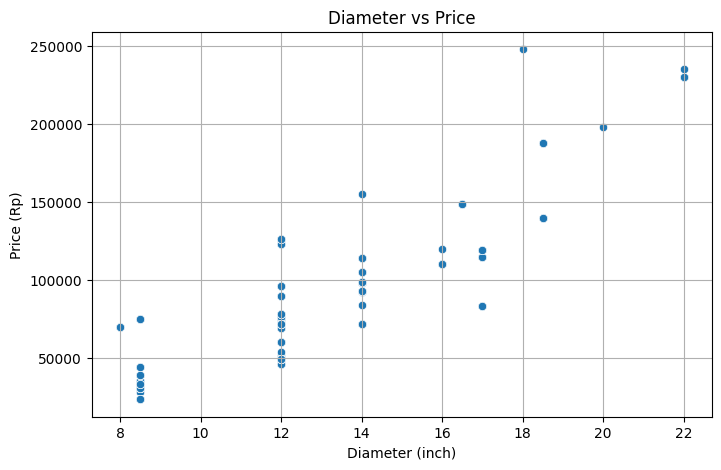

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#Correlation Between Numerical Features (Price vs Diameter)
plt.figure(figsize=(8,5))
sns.scatterplot(x='diameter', y='price_rupiah', data=merged_df)
plt.title("Diameter vs Price")
plt.xlabel("Diameter (inch)")
plt.ylabel("Price (Rp)")
plt.grid(True)
plt.show()

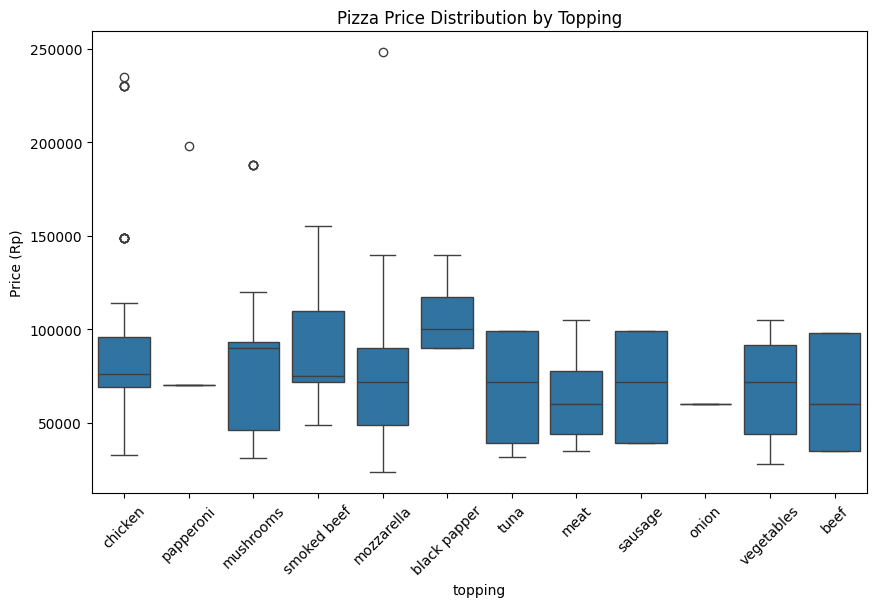

In [17]:
# Boxplot of Prices by Topping
plt.figure(figsize=(10,6))
sns.boxplot(x='topping', y='price_rupiah', data=merged_df)
plt.xticks(rotation=45)
plt.title("Pizza Price Distribution by Topping")
plt.ylabel("Price (Rp)")
plt.show()

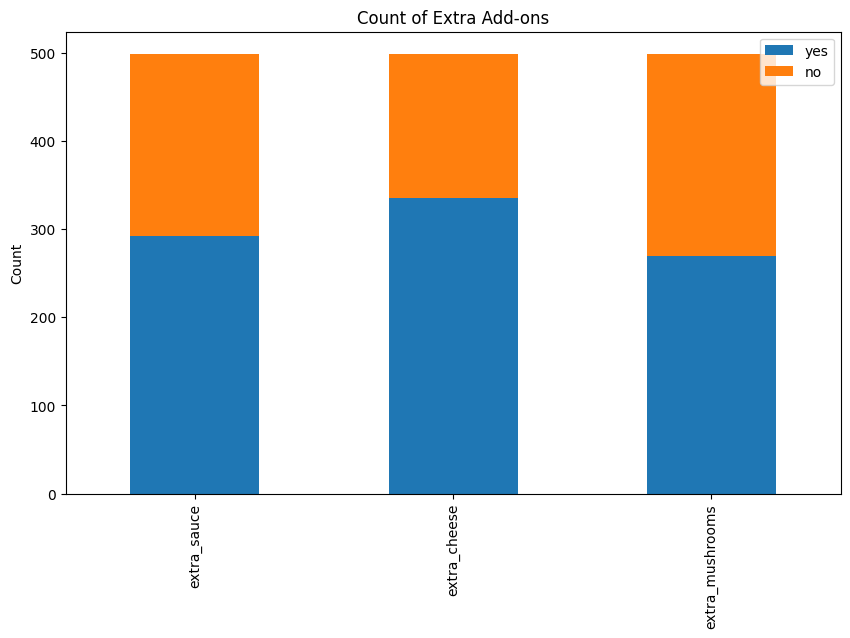

In [18]:
# Count of Extra Add-ons
add_ons = merged_df[['extra_sauce', 'extra_cheese', 'extra_mushrooms']].apply(lambda x: x.value_counts()).T
add_ons.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Count of Extra Add-ons")
plt.ylabel("Count")
plt.show()

In [19]:
merged_df.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [20]:
merged_df.head()

,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,155000.0,14.0,smoked beef,double_signature,reguler,yes,no,yes
4,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [21]:
# يقوم فقط بتحويل الرقم المدخل إلى رقم جديد أصغر عن طريق الضرب في 0.0054
def convert(value):
    return value*0.0054

In [22]:
merged_df['price'] = merged_df['price'].apply(convert)

In [24]:
merged_df.head()

,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,837.0,14.0,smoked beef,double_signature,reguler,yes,no,yes
4,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


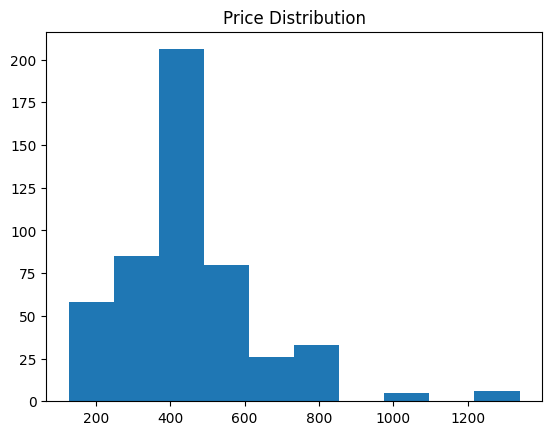

In [28]:
import matplotlib.pyplot as plt
plt.hist(x = "price",data=merged_df)
plt.title("Price Distribution")
plt.show()

In [31]:
merged_df['topping'].value_counts()

,count
topping,
chicken,117
mozzarella,101
mushrooms,87
smoked beef,76
tuna,27
meat,23
vegetables,23
black papper,16
sausage,12


<Axes: xlabel='count', ylabel='topping'>

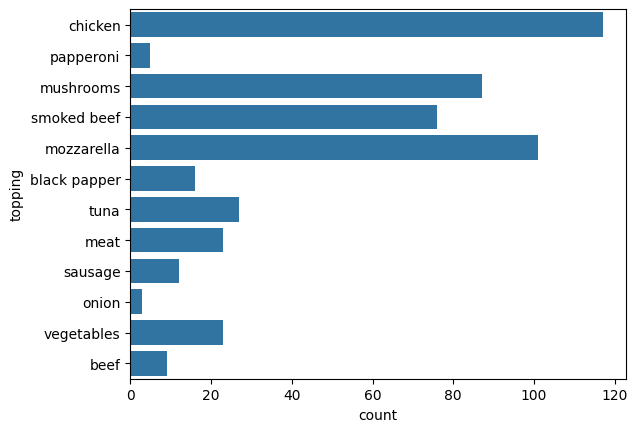

In [32]:
sns.countplot(y = merged_df['topping'])

<Axes: xlabel='count', ylabel='variant'>

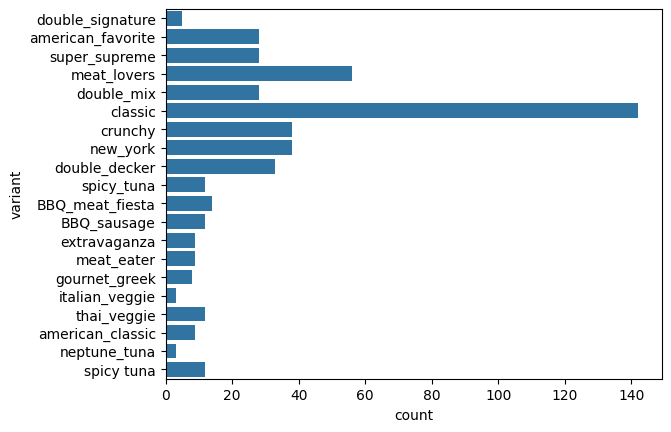

In [35]:
sns.countplot(y = merged_df['variant'])

<Axes: xlabel='count', ylabel='size'>

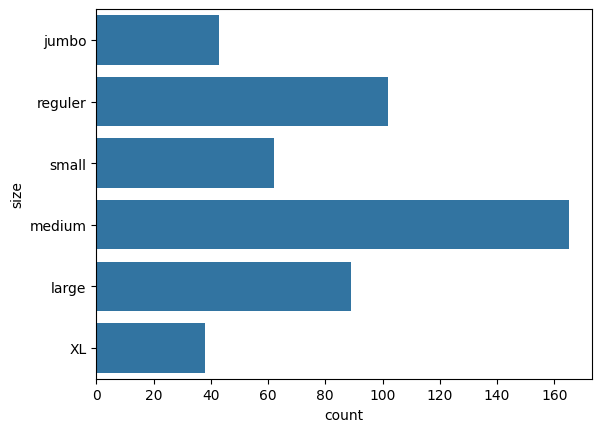

In [37]:
sns.countplot(y = merged_df['size'])

<Axes: xlabel='count', ylabel='extra_sauce'>

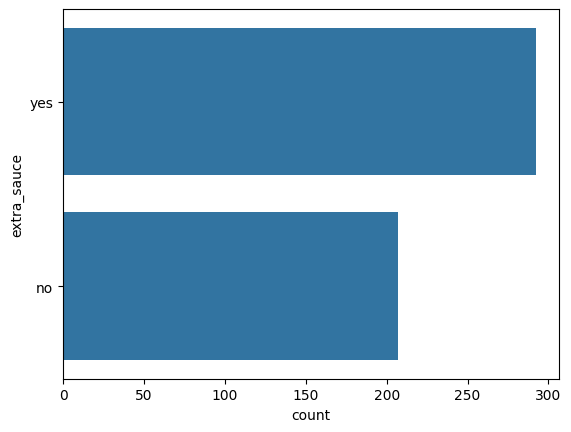

In [38]:
sns.countplot(merged_df['extra_sauce'])

<Axes: xlabel='count', ylabel='extra_cheese'>

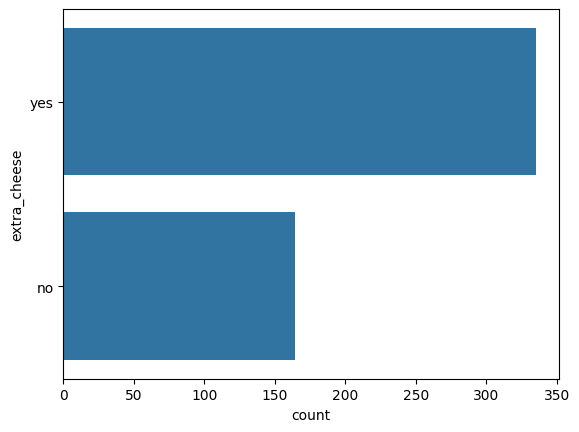

In [39]:
sns.countplot(merged_df['extra_cheese'])

<Axes: xlabel='count', ylabel='extra_mushrooms'>

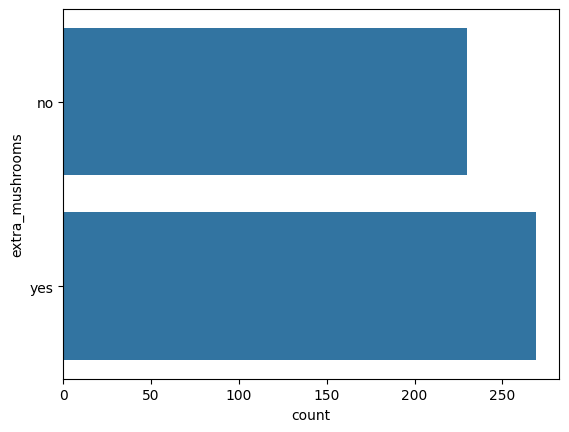

In [40]:
sns.countplot( y = merged_df['extra_mushrooms'])

<Axes: xlabel='price', ylabel='topping'>

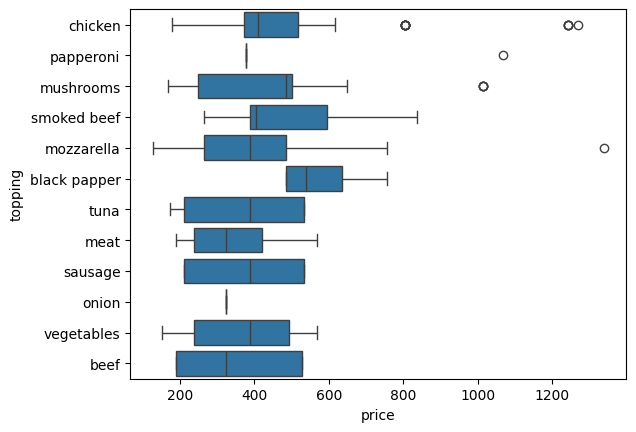

In [44]:
sns.boxplot(y='topping',x='price',data=merged_df)

<Axes: xlabel='size', ylabel='price'>

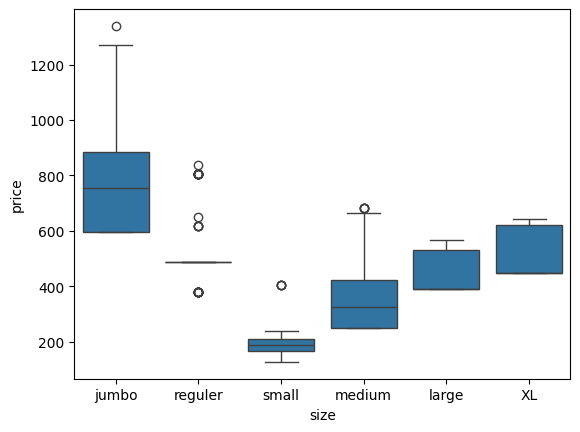

In [45]:
sns.boxplot(x='size',y='price',data=merged_df)

In [46]:
merged_df[merged_df['price'].max()==merged_df['price']]

,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [52]:
merged_df[merged_df['size']=='jumbo']['diameter'].head()

,diameter
0,22.0
1,20.0
4,18.0
5,18.5
6,18.5


In [54]:
from sklearn.preprocessing import OneHotEncoder

# Select features and target
X = merged_df.drop('price', axis=1)
y = merged_df['price']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))

MAE: 6.6055500000002265


In [56]:
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm  = SVR()
svm.fit(X_train,y_train)

rf  = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

In [59]:
from sklearn import metrics

In [60]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [61]:
print(score1,score2,score3,score4,score5)

0.8796973608853613 0.10311557908113367 0.9913180375285789 0.9745266100714937 0.9979276558989393


In [62]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
             'R2_SCORE':[score1,score2,score3,score4,score5]})

In [65]:
print(final_data)

  Models  R2_SCORE
0     LR  0.879697
1    SVR  0.103116
2     RF  0.991318
3     GB  0.974527
4    XGR  0.997928


<Axes: xlabel='Models', ylabel='R2_SCORE'>

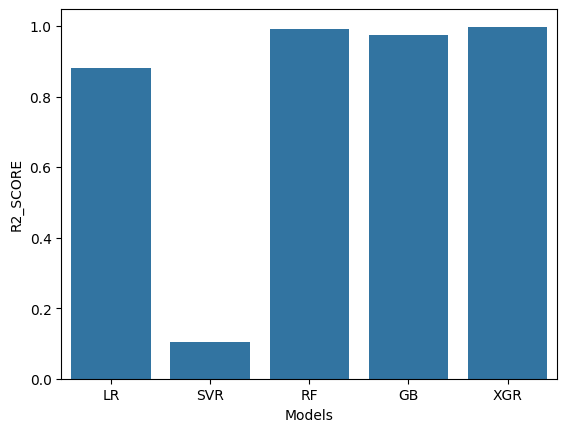

In [67]:
sns.barplot(x=final_data['Models'],y=final_data['R2_SCORE'])

In [76]:
rf.feature_importances_

array([4.94779385e-01, 1.40285417e-17, 2.13670748e-02, 3.02048845e-04,
       5.64363444e-03, 1.10743337e-02, 1.13372720e-04, 2.33253971e-04,
       1.31705304e-04, 1.51991978e-02, 2.53738111e-04, 9.07272252e-05,
       1.10432496e-04, 4.02880845e-04, 1.36282566e-04, 4.42291601e-02,
       1.47108074e-02, 5.42567241e-02, 2.38705591e-02, 1.83078245e-02,
       1.58704624e-04, 1.43601060e-04, 9.61168436e-04, 1.81795976e-04,
       3.05942194e-17, 2.86342557e-04, 6.10157011e-02, 8.74365545e-05,
       9.07752302e-05, 2.03283842e-06, 1.20111873e-04, 2.35462828e-03,
       3.94017351e-03, 6.05679390e-02, 8.20336321e-03, 1.19998950e-01,
       3.35275118e-02, 2.48613657e-03, 6.60484887e-04])

In [77]:
fea = pd.Series(rf.feature_importances_,index=X_train.columns)

<Axes: >

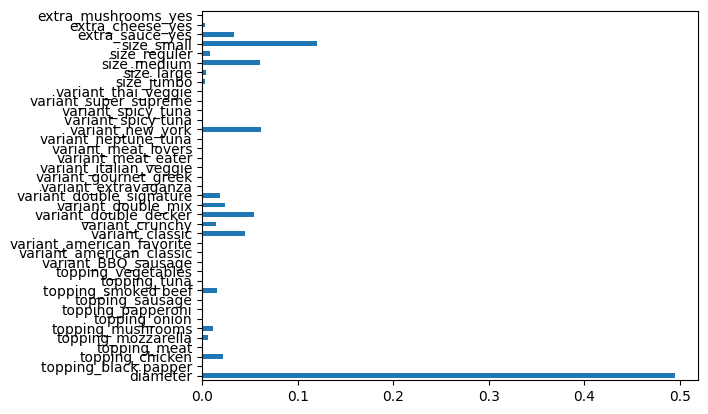

In [78]:
fea.plot(kind='barh')

In [79]:
gbr.feature_importances_

array([5.34078839e-01, 1.41578107e-05, 1.94671204e-02, 3.65237193e-04,
       2.26178558e-03, 3.81800184e-03, 4.33697951e-04, 1.10932619e-04,
       0.00000000e+00, 9.42259115e-03, 6.44232063e-05, 2.46133373e-05,
       0.00000000e+00, 3.04032884e-04, 0.00000000e+00, 6.50850612e-02,
       1.05636061e-02, 5.18517155e-02, 2.03152367e-02, 9.71801806e-03,
       3.47641124e-05, 4.63276566e-04, 8.63700415e-04, 5.05627968e-04,
       5.12778807e-06, 4.32302941e-04, 5.35053813e-02, 0.00000000e+00,
       0.00000000e+00, 1.86686508e-05, 0.00000000e+00, 9.65688996e-05,
       1.22667953e-03, 2.36215758e-02, 5.63446643e-02, 7.70900090e-02,
       5.54785388e-02, 1.03071181e-03, 1.38333152e-03])

In [80]:
fea = pd.Series(gbr.feature_importances_,index=X_train.columns)

<Axes: >

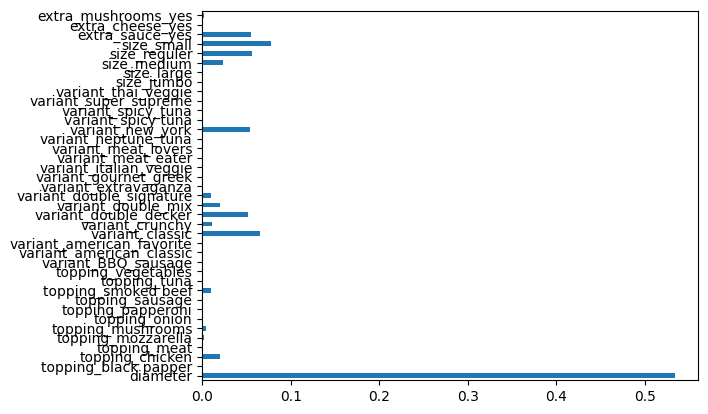

In [81]:
fea.plot(kind='barh')

In [82]:
xg.feature_importances_

array([8.0345526e-02, 8.7382269e-08, 1.6375413e-02, 1.3127901e-03,
       5.0185029e-03, 8.2319090e-03, 1.2670342e-03, 3.7477706e-03,
       5.7631874e-05, 1.2349032e-02, 2.0516496e-04, 2.1343675e-04,
       0.0000000e+00, 8.7678310e-04, 9.3937768e-07, 3.2032110e-02,
       3.6540248e-03, 1.2506154e-01, 6.7892461e-03, 1.2863842e-02,
       3.8538178e-04, 6.5156107e-04, 1.1112820e-03, 7.1491615e-04,
       3.6813967e-07, 5.1321130e-04, 2.9168245e-01, 9.9824872e-05,
       4.8998036e-06, 5.5941172e-07, 2.0710697e-05, 9.3890440e-06,
       2.3534334e-05, 3.5606869e-02, 9.0043625e-07, 3.0303079e-01,
       5.5461779e-02, 2.7822860e-04, 6.0963873e-07], dtype=float32)

In [83]:
fea = pd.Series(xg.feature_importances_,index=X_train.columns)

<Axes: >

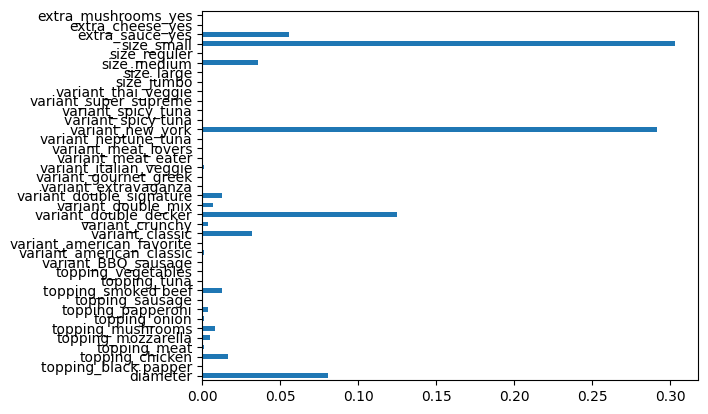

In [84]:
fea.plot(kind='barh')

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
# بيانات بيتزا جديدة
new_pizza = pd.DataFrame([{
    'diameter': 18,
    'topping': 'mozzarella',
    'variant': 'double_signature',
    'size': 'jumbo',
    'extra_sauce': 'yes',
    'extra_cheese': 'no',
    'extra_mushrooms': 'yes'
}])
# قائمة المتغيرات الفئوية
categorical_features = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']

# معالجة المتغيرات الفئوية
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)
predicted_price = model.predict(new_pizza)
print(f"السعر المتوقع: Rp{int(predicted_price[0]):,}")

السعر المتوقع: Rp247,999


In [111]:
# --- إنشاء النموذج ---
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# --- تقسيم البيانات ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- تدريب النموذج ---
model1.fit(X_train, y_train)

# --- التنبؤ ---
y_pred = model1.predict(X_test)
predicted_price = model1.predict(new_pizza)

print(f"السعر المتوقع: Rp{int(predicted_price[0]):,}")

السعر المتوقع: Rp225,620


In [110]:
# --- إنشاء النموذج ---
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('GBregressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# --- تقسيم البيانات ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- تدريب النموذج ---
model2.fit(X_train, y_train)

# --- التنبؤ ---
y_pred = model2.predict(X_test)
predicted_price = model2.predict(new_pizza)

print(f"السعر المتوقع: Rp{int(predicted_price[0]):,}")


السعر المتوقع: Rp247,998
